#### MWE for JOSSv2 paper code snippets

In [1]:
from PySDM import Formulae
from PySDM.physics import si
from PySDM_examples.Singer_Ward.aerosol import AerosolBetaCaryophylleneDark
aerosol = AerosolBetaCaryophylleneDark()
formulae_bulk = Formulae(surface_tension='Constant')
formulae_ovad = Formulae(
    surface_tension='CompressedFilmOvadnevaite',
    constants={
        'sgm_org': 35 * si.mN / si.m,
        'delta_min': 1.75 * si.nm
    }
)
formulae_ruehl = Formulae(
    surface_tension='CompressedFilmRuehl',
    constants={
        'RUEHL_nu_org': aerosol.aerosol_modes[0]['nu_org'],
        'RUEHL_A0': 115e-20 * si.m * si.m,
        'RUEHL_C0': 6e-7,
        'RUEHL_m_sigma': 0.3e17 * si.J / si.m**2,
        'RUEHL_sgm_min': 35 * si.mN / si.m
    }
)
formulae_sl = Formulae(
    surface_tension='SzyszkowskiLangmuir',
    constants={
        'RUEHL_nu_org': aerosol.aerosol_modes[0]['nu_org'],
        'RUEHL_A0': 115e-20 * si.m * si.m,
        'RUEHL_C0': 6e-7,
        'RUEHL_sgm_min': 35 * si.mN / si.m
    }
)

<string>:46: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
/Users/claresinger/anaconda3/envs/pysdm/lib/python3.9/site-packages/numba/core/utils.py:544: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


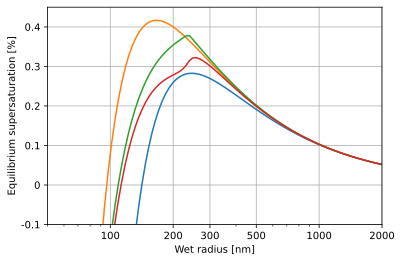

HTML(value="<a href='./Singer_fig1_kohler.pdf' target='_blank'>./Singer_fig1_kohler.pdf</a><br>")

In [2]:
import numpy as np
from matplotlib import pylab
from atmos_cloud_sim_uj_utils import show_plot
for formulae in (formulae_bulk, formulae_ovad, formulae_ruehl, formulae_sl):    
    r_wet = np.logspace(np.log(50 * si.nm), np.log(2000 * si.nm), base=np.e, num=100)
    sigma = np.ones(len(r_wet))
    for j,vw in enumerate(formulae_ovad.trivia.volume(r_wet)):
        sigma[j] = formulae.surface_tension.sigma(
            300 * si.K,
            vw,
            formulae_ovad.trivia.volume(50 * si.nm),
            aerosol.aerosol_modes[0]['f_org']
        )
    RH_eq = formulae.hygroscopicity.RH_eq(
        r_wet,
        300 * si.K,
        aerosol.aerosol_modes[0]['kappa'][formulae.surface_tension.__name__],
        (50 * si.nm)**3,
        sigma
    )
    pylab.plot(r_wet / si.nm, (RH_eq - 1)*100)
pylab.grid()
pylab.xscale('log')
r_wet_ticks_nm = (100, 200, 300, 500, 1000, 2000)
pylab.xticks(r_wet_ticks_nm, r_wet_ticks_nm)
pylab.xlim(r_wet[0] / si.nm, r_wet[-1] / si.nm)
pylab.ylabel('Equilibrium supersaturation [%]')
yticks = (-.1, 0, .1, .2, .3, .4)
pylab.yticks(yticks, yticks)
pylab.ylim(yticks[0], .45)
pylab.xlabel('Wet radius [nm]')
show_plot("Singer_fig1_kohler.pdf")
pylab.show()